In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Отбор признаков

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [7]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [8]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<Axes: xlabel='engine-type', ylabel='Count'>

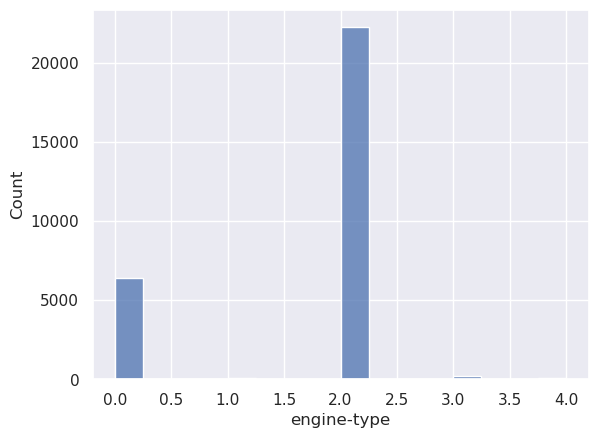

In [9]:
sns.histplot(data=train_X, x='engine-type')

In [10]:
#sns.pairplot(train_X[numerical]);

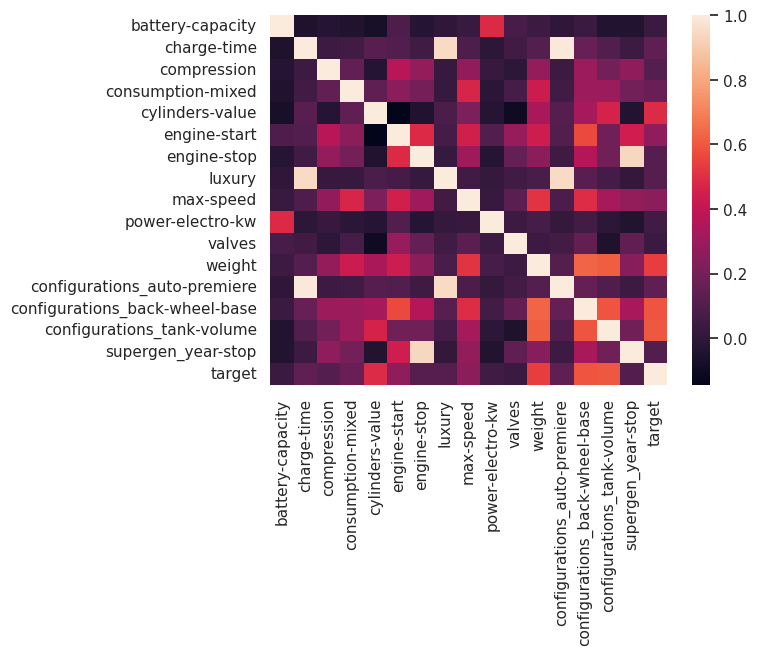

In [11]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [12]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.1100375236095559 p-value: 9.725646829239856e-79


In [13]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667099635 p-value: 5.610547363610232e-05


## F-test

In [15]:
from sklearn.feature_selection import f_regression, SelectKBest

In [16]:
f_statistic, p_values = f_regression(train_X, train_y)

/home/438a13c2-ac28-404f-86a4-35e598686c35/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 1.00000000e+000])

In [18]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

/home/438a13c2-ac28-404f-86a4-35e598686c35/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [19]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

!pip install shap

In [22]:
import shap

In [23]:
print(set(train_X.columns) - set(test_X.columns))  # какие признаки есть в train_X, но нет в test_X
print(set(test_X.columns) - set(train_X.columns))  # какие признаки есть в test_X, но нет в train_X

{'target'}
set()


In [24]:
train_X = train_X.drop(columns=['target'], errors='ignore')
test_X = test_X.drop(columns=['target'], errors='ignore')


In [25]:
common_features = list(set(train_X.columns) & set(test_X.columns))
train_X = train_X[common_features]
test_X = test_X[common_features]

In [26]:
reg = LinearRegression().fit(train_X, train_y)

In [27]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

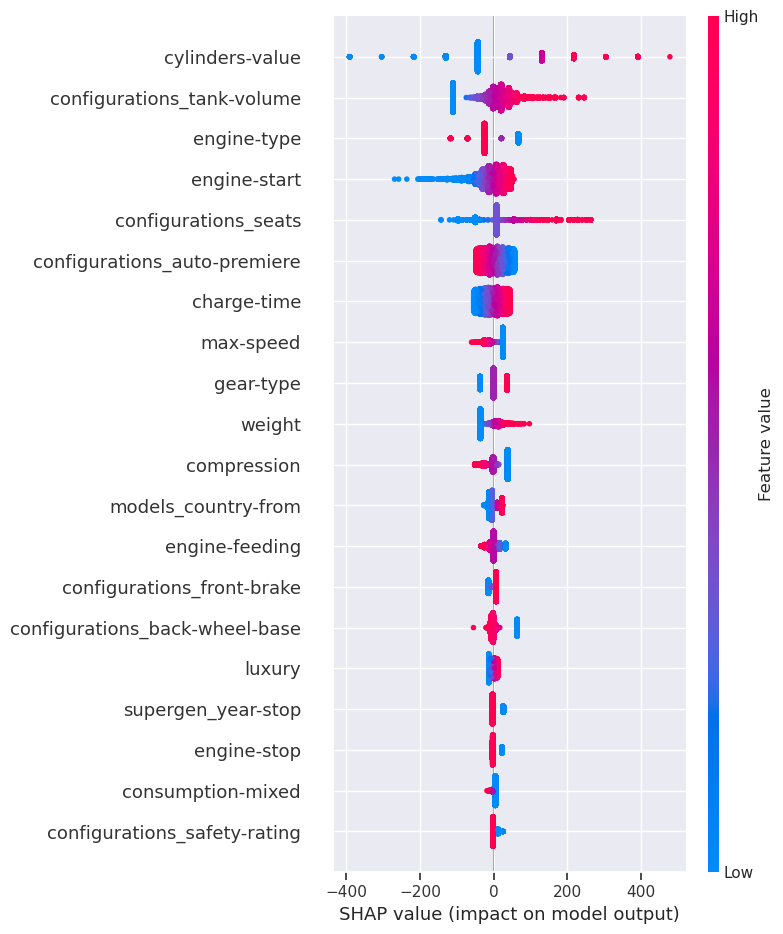

In [28]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [30]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

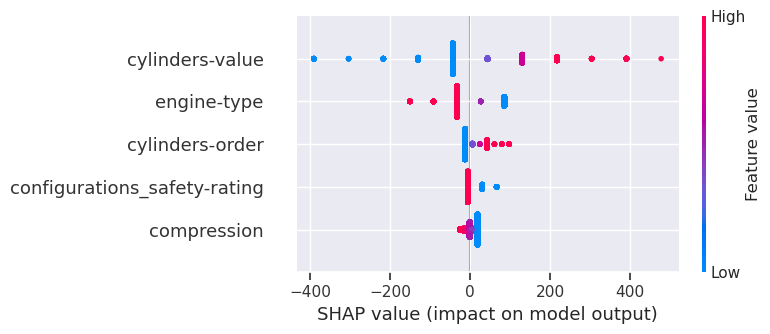

In [31]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

## Пермутационная важность

In [35]:
import eli5
from eli5.sklearn import PermutationImportance

In [36]:
reg = LinearRegression().fit(train_X, train_y)

In [37]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [38]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.3697 ± 0.0071,cylinders-value
0.0999 ± 0.0049,configurations_tank-volume
0.0957 ± 0.0025,configurations_seats
0.0520 ± 0.0030,engine-type
0.0479 ± 0.0046,engine-start
0.0298 ± 0.0039,configurations_auto-premiere
0.0279 ± 0.0019,charge-time
0.0208 ± 0.0014,gear-type
0.0184 ± 0.0022,compression
0.0155 ± 0.0027,weight


In [39]:
reg = LinearRegression().fit(train_X, train_y)

In [40]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [41]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.3697 ± 0.0071,cylinders-value
0.0999 ± 0.0049,configurations_tank-volume
0.0957 ± 0.0025,configurations_seats
0.0520 ± 0.0030,engine-type
0.0479 ± 0.0046,engine-start
0.0298 ± 0.0039,configurations_auto-premiere
0.0279 ± 0.0019,charge-time
0.0208 ± 0.0014,gear-type
0.0184 ± 0.0022,compression
0.0155 ± 0.0027,weight


### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [56]:
def permutation_importance(reg, X_test, y_test, metric=mean_squared_error, n_repeats=10):
    baseline_score = metric(y_test, reg.predict(X_test))
    feature_importances = {}

    for col in X_test.columns:
        scores = []
        for _ in range(n_repeats):
            X_test_permuted = X_test.copy()
            X_test_permuted[col] = shuffle(X_test_permuted[col].values)
            permuted_score = metric(y_test, reg.predict(X_test_permuted))
            scores.append(permuted_score - baseline_score)

        feature_importances[col] = np.mean(scores)
    
    return feature_importances

#вычисление важности признаков
feature_importance = permutation_importance(reg, test_X, test_y)
feature_importance

{'cylinders-value': 21426.477498902903,
 'engine-type': 2989.3984046807045,
 'configurations_safety-rating': 35.057557438696314,
 'cylinders-order': -11.671848880777906,
 'compression': 1098.3451793843183,
 'power-electro-kw': 48.76416848707013,
 'luxury': 114.11397683666837,
 'battery-capacity': 539.0504748644155,
 'supergen_year-stop': 153.33890542598928,
 'models_light-and-commercial': 195.58674847997025,
 'engine-start': 2749.202071771529,
 'supply-system': 4.288759415905952,
 'valves': 163.7700032561661,
 'engine-feeding': 407.9626083643434,
 'consumption-mixed': 32.4924834399535,
 'configurations_front-brake': 179.3019023934703,
 'max-speed': 834.2093536112018,
 'models_country-from': 359.14036941037705,
 'back-suspension': -0.07691669084160821,
 'gear-type': 1147.3377370289327,
 'models_male': 6.528728971135206,
 'engine-stop': 101.48362492317611,
 'configurations_back-wheel-base': 671.5603084487491,
 'charge-time': 1670.40808784117,
 'weight': 831.9926759868376,
 'configuration

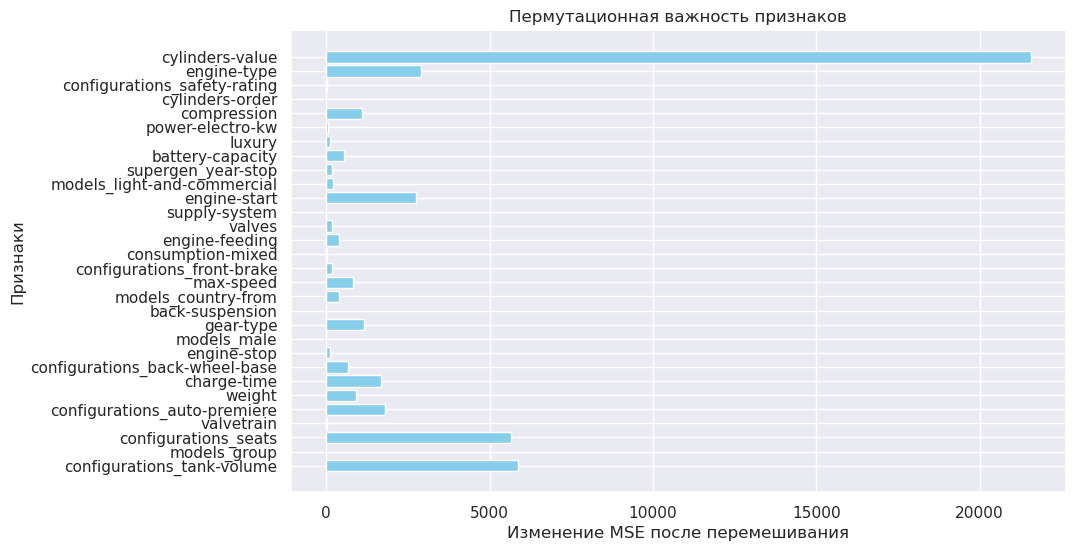

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(list(feature_importance.keys()), list(feature_importance.values()), color='skyblue')
plt.xlabel("Изменение MSE после перемешивания")
plt.ylabel("Признаки")
plt.title("Пермутационная важность признаков")
plt.gca().invert_yaxis()
plt.show()

Оба метода – eli5 и пермутационная важность – показывают схожие результаты в оценке значимости признаков, с ключевым подтверждением того, что cylinders-value является наиболее важным. 

eli5 дает более компактную интерпретацию, выделяя только наиболее значимые признаки, а пермутационный метод распределяет влияние признаков более плавно и учитывает даже слабые зависимости. 